In [330]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders.binary import BinaryEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import skew, kurtosis
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import root_mean_squared_error
# Метрика RMSE

# Обзор

In [331]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
y=train['SalePrice']
pattern = pd.read_csv('sample_submission.csv')
all_data = pd.concat([train.iloc[:,:-1], test], axis=0)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [332]:
train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [333]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [334]:
print(all_data.isnull().sum().sort_values(ascending=False).head(30))

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
MasVnrType      1766
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageCond       159
GarageYrBlt      159
GarageFinish     159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
BsmtUnfSF          1
GarageArea         1
Exterior1st        1
Exterior2nd        1
TotalBsmtSF        1
GarageCars         1
Electrical         1
dtype: int64


In [335]:
# Alley, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1,
# BsmtFinType2, FireplaceQu, GarageType, GarageFinish,
# GarageQual, GarageCond, PoolQC, Fence, MiscFeature, MasVnrType

# У данных признаков nan имеет физичекий смысл
# GarageType -> GarageYrBlt возможно есть зависимость (нет гаража -> пропуск)

# Категориальные признаки или что-то на них похожее:
# 1) признаки хорошести
cols_for_LE = ['LotShape', 
'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
'PoolQC', 'Fence']

# 2) хорошесть, но LE:
cols_as_distance = ['Condition1', 'Condition2', 'CentralAir']

# 3) общие категориальные
cols_for_BE = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 
'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', # 'MiscFeature',
'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical',
'GarageType', 'PavedDrive', 'SaleType', 'SaleCondition', 'LandSlope', 'Utilities']

In [336]:
"""
PoolQC          2909 - объяснимо
MiscFeature     2814 - на дроп
Alley           2721 - объяснимо
Fence           2348 - объяснимо
MasVnrType      1766 - объяснимо
FireplaceQu     1420 - объяснимо
LotFrontage      486 - скорее всего 0, т.к. ситуация возможна, а в датасете мин - 21
GarageQual       159 - объяснимо
GarageCond       159 - объяснимо
GarageYrBlt      159 - объяснимо
GarageFinish     159 - объяснимо
GarageType       157 - объяснимо
BsmtExposure      82 - даже если не объяснимо, воспринимаем как ошибка
BsmtCond          82
BsmtQual          81
"""

'\nPoolQC          2909 - объяснимо\nMiscFeature     2814 - на дроп\nAlley           2721 - объяснимо\nFence           2348 - объяснимо\nMasVnrType      1766 - объяснимо\nFireplaceQu     1420 - объяснимо\nLotFrontage      486 - скорее всего 0, т.к. ситуация возможна, а в датасете мин - 21\nGarageQual       159 - объяснимо\nGarageCond       159 - объяснимо\nGarageYrBlt      159 - объяснимо\nGarageFinish     159 - объяснимо\nGarageType       157 - объяснимо\nBsmtExposure      82 - даже если не объяснимо, воспринимаем как ошибка\nBsmtCond          82\nBsmtQual          81\n'

In [337]:
all_data.drop(['MiscFeature'], axis=1, inplace=True)

# Заполнение пропусков

In [338]:
all_data.loc[all_data['PoolQC'].isna(), 'PoolQC'] = 'No'
all_data.loc[all_data['Alley'].isna(), 'Alley'] = 'No'
all_data.loc[all_data['Fence'].isna(), 'Fence'] = 'No'
all_data.loc[all_data['MasVnrType'].isna(), 'MasVnrType'] = 'No'
all_data.loc[all_data['FireplaceQu'].isna(), 'FireplaceQu'] = 'No'
all_data.loc[all_data['GarageQual'].isna(), 'GarageQual'] = 'No'
all_data.loc[all_data['GarageCond'].isna(), 'GarageCond'] = 'No'
all_data.loc[all_data['GarageFinish'].isna(), 'GarageFinish'] = 'No'
all_data.loc[all_data['GarageType'].isna(), 'GarageType'] = 'No'
all_data.loc[all_data['GarageYrBlt'].isna(), 'GarageYrBlt'] = train['GarageYrBlt'].median()
all_data.loc[all_data['LotFrontage'].isna(), 'LotFrontage'] = 0

all_data.loc[all_data['BsmtQual'].isna(), 'BsmtQual'] = 'No'
all_data.loc[all_data['BsmtCond'].isna(), 'BsmtCond'] = 'No'
all_data.loc[all_data['BsmtExposure'].isna(), 'BsmtExposure'] = 'No'
all_data.loc[all_data['BsmtFinType2'].isna(), 'BsmtFinType2'] = 'No'
all_data.loc[all_data['BsmtFinType1'].isna(), 'BsmtFinType1'] = 'No'

all_data.loc[all_data['MasVnrArea'].isna(), 'MasVnrArea'] = 0

In [339]:
print(all_data.isnull().sum().sort_values(ascending=False))

MSZoning         4
Utilities        2
Functional       2
BsmtFullBath     2
BsmtHalfBath     2
                ..
BsmtFinType1     0
BsmtFinType2     0
MSSubClass       0
HeatingQC        0
SaleCondition    0
Length: 79, dtype: int64


In [340]:
all_data.loc[all_data['MSZoning'].isna(), 'MSZoning'] = train['MSZoning'].mode()[0]
all_data.loc[all_data['Utilities'].isna(), 'Utilities'] = train['Utilities'].mode()[0]
all_data.loc[all_data['Functional'].isna(), 'Functional'] = train['Functional'].mode()[0]
all_data.loc[all_data['BsmtFullBath'].isna(), 'BsmtFullBath'] = train['BsmtFullBath'].mode()[0]
all_data.loc[all_data['BsmtHalfBath'].isna(), 'BsmtHalfBath'] = train['BsmtHalfBath'].mode()[0]

all_data.loc[all_data['Electrical'].isna(), 'Electrical'] = train['Electrical'].mode()[0]
all_data.loc[all_data['BsmtFinSF2'].isna(), 'BsmtFinSF2'] = train['BsmtFinSF2'].mode()[0]
all_data.loc[all_data['GarageArea'].isna(), 'GarageArea'] = train['GarageArea'].mode()[0]
all_data.loc[all_data['GarageCars'].isna(), 'GarageCars'] = train['GarageCars'].mode()[0]

all_data.loc[all_data['Exterior1st'].isna(), 'Exterior1st'] = train['Exterior1st'].mode()[0]
all_data.loc[all_data['SaleType'].isna(), 'SaleType'] = train['SaleType'].mode()[0]
all_data.loc[all_data['Exterior2nd'].isna(), 'Exterior2nd'] = train['Exterior2nd'].mode()[0]
all_data.loc[all_data['BsmtUnfSF'].isna(), 'BsmtUnfSF'] = train['BsmtUnfSF'].mode()[0]

all_data.loc[all_data['TotalBsmtSF'].isna(), 'TotalBsmtSF'] = train['TotalBsmtSF'].mode()[0]
all_data.loc[all_data['BsmtFinSF1'].isna(), 'BsmtFinSF1'] = train['BsmtFinSF1'].mode()[0]
all_data.loc[all_data['KitchenQual'].isna(), 'KitchenQual'] = train['KitchenQual'].mode()[0]

all_data.drop(['Id'], inplace=True, axis=1)

In [341]:
print(all_data.isnull().sum().sort_values(ascending=False).head())

MSSubClass     0
HalfBath       0
FireplaceQu    0
Fireplaces     0
Functional     0
dtype: int64


# Снова обзор

In [342]:
cont_cols = list(set(all_data.columns) - set(cols_for_BE + cols_as_distance + cols_for_LE))
all_data['BsmtFullBath'] = all_data['BsmtFullBath'].astype(int)
all_data['BsmtHalfBath'] = all_data['BsmtHalfBath'].astype(int)
all_data['GarageCars'] = all_data['GarageCars'].astype(int)

In [343]:
float_cols = all_data.select_dtypes(include=['float']).columns.tolist()
float_cols

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GarageYrBlt',
 'GarageArea']

In [344]:
print(all_data.isnull().sum().sort_values(ascending=False).head(2))
print(train.shape, test.shape)
train = all_data.iloc[:train.shape[0]]
test = all_data.iloc[train.shape[0]:]
print(train.shape, test.shape)
all_data = pd.concat([train.iloc[:,:], test], axis=0)
print(all_data.isnull().sum().sort_values(ascending=False).head(2))

MSSubClass    0
HalfBath      0
dtype: int64
(1460, 81) (1459, 80)
(1460, 78) (1459, 78)
MSSubClass    0
HalfBath      0
dtype: int64


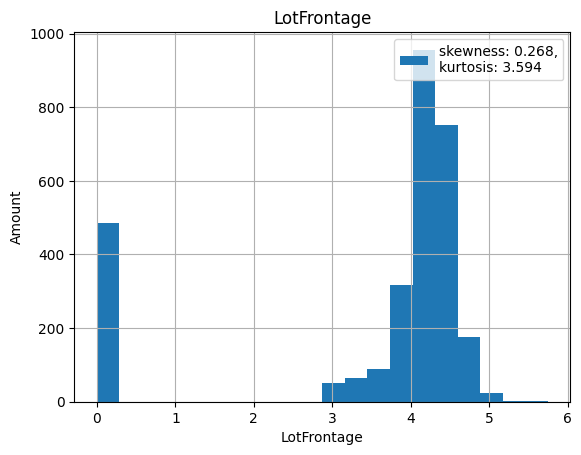

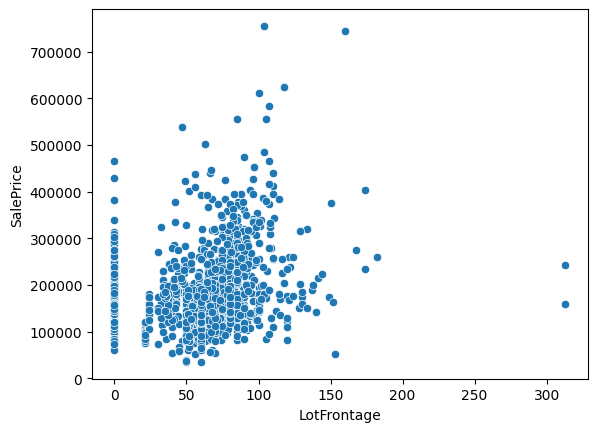

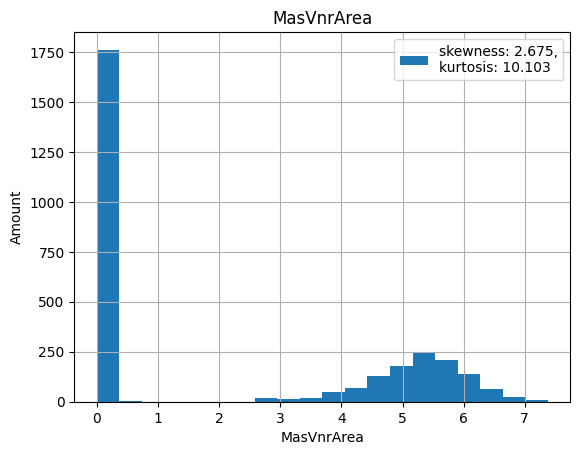

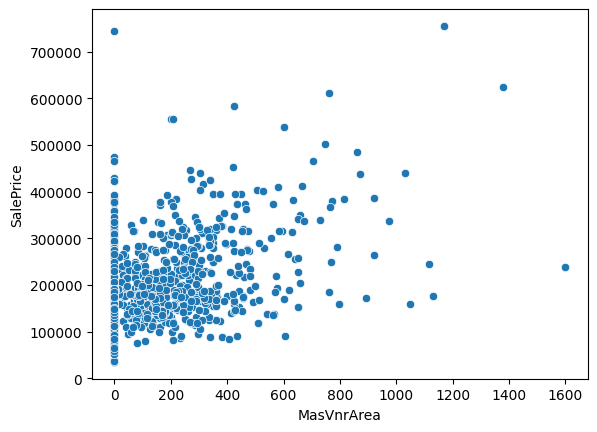

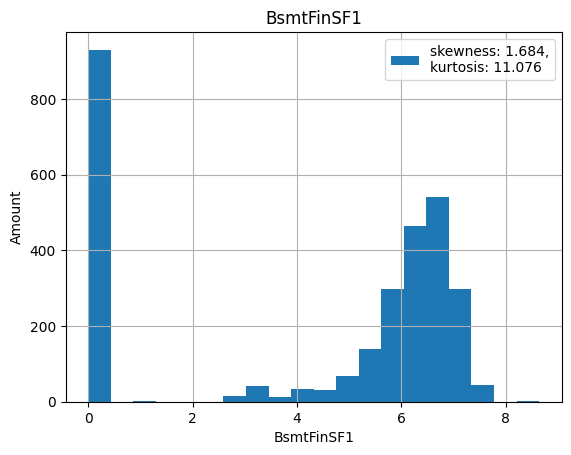

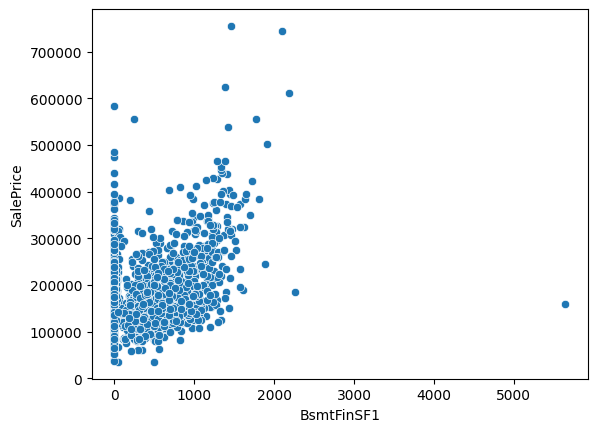

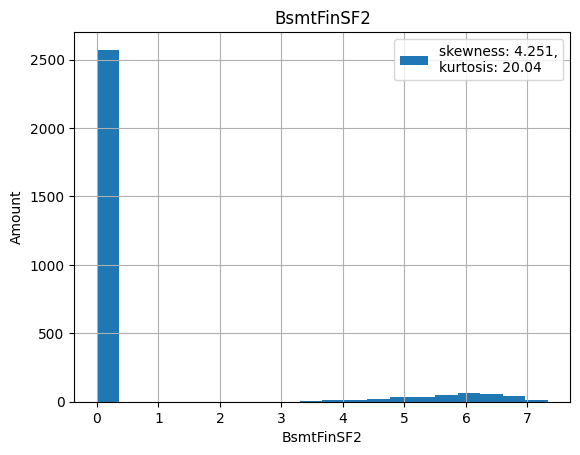

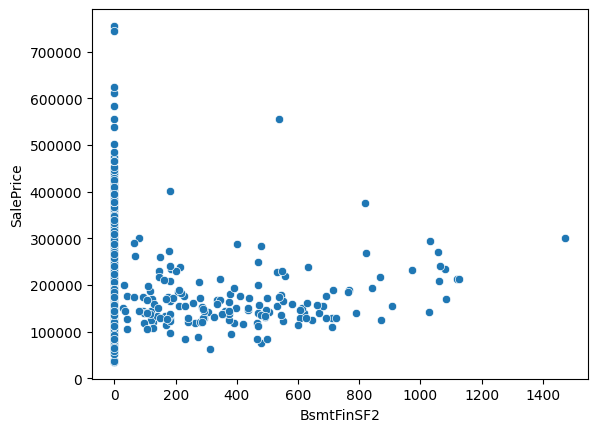

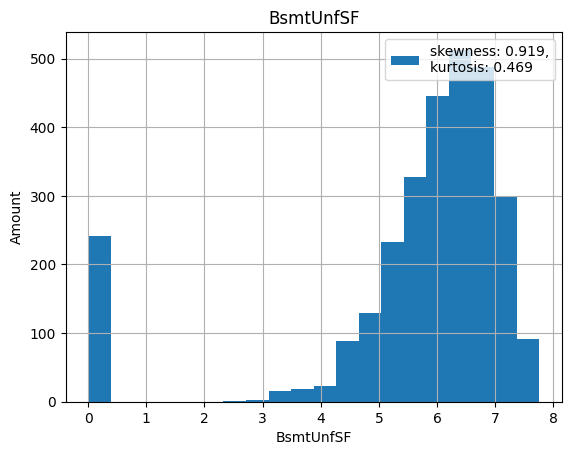

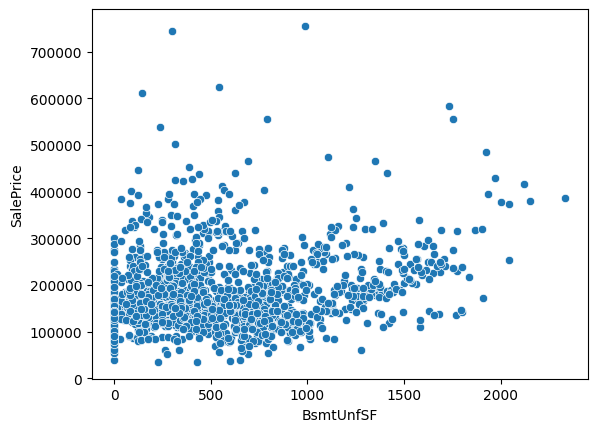

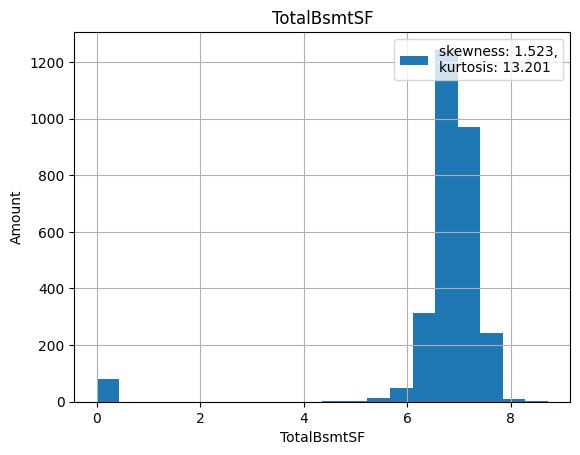

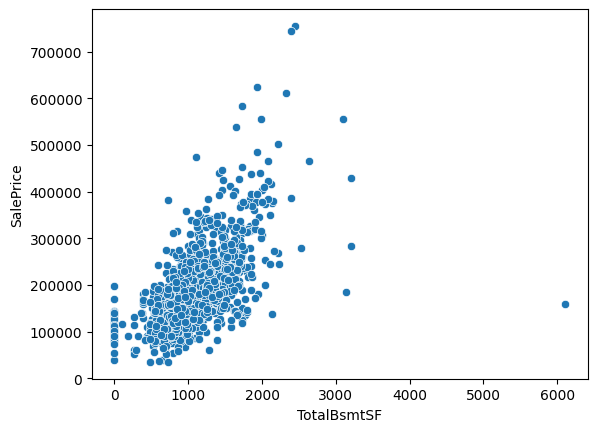

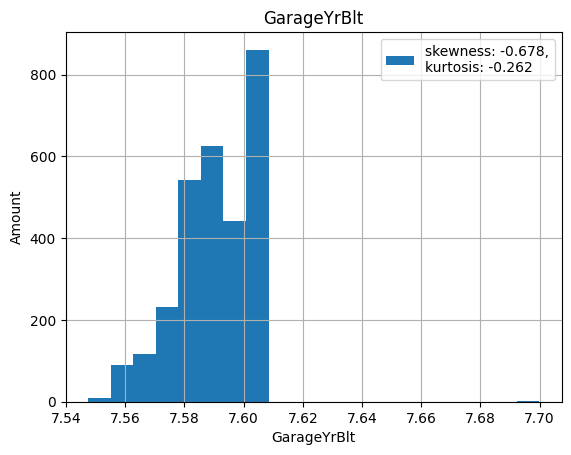

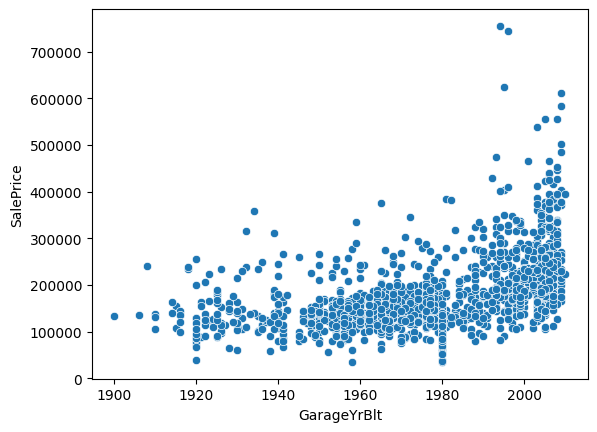

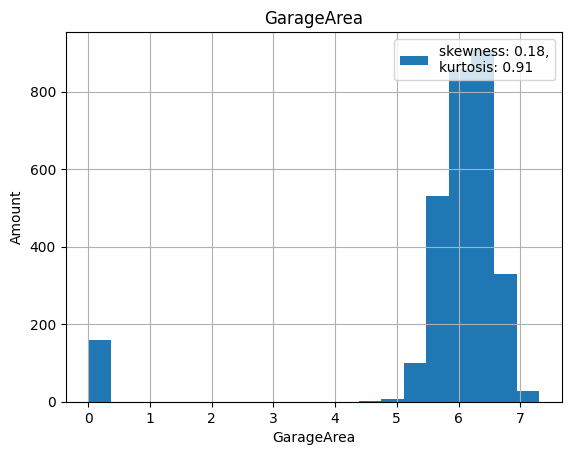

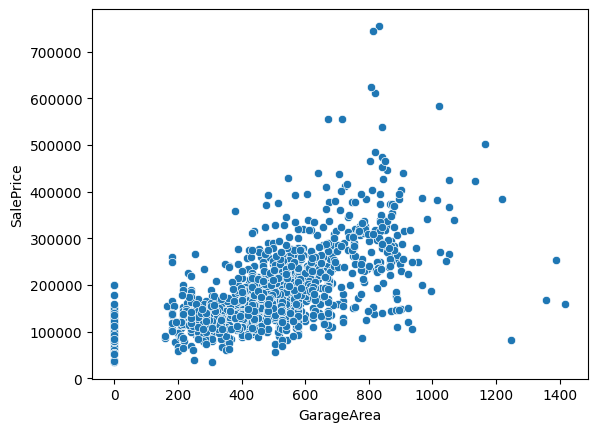

In [345]:
for i in float_cols:
    all_data[i] = np.log1p(all_data[i])
    all_data[i].hist(bins=20)
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('Amount')
    plt.legend((f'skewness: {round(skew(train[i], nan_policy='omit'), 3)},\n' +
                f'kurtosis: {round(kurtosis(train[i], nan_policy='omit'), 3)}', ), 
                loc='upper right'
            )
    plt.show()
    sns.scatterplot(data=train, x=i, y=y)
    plt.show()

In [346]:
int_cols = all_data.select_dtypes(include=['int']).columns.tolist()
int_cols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

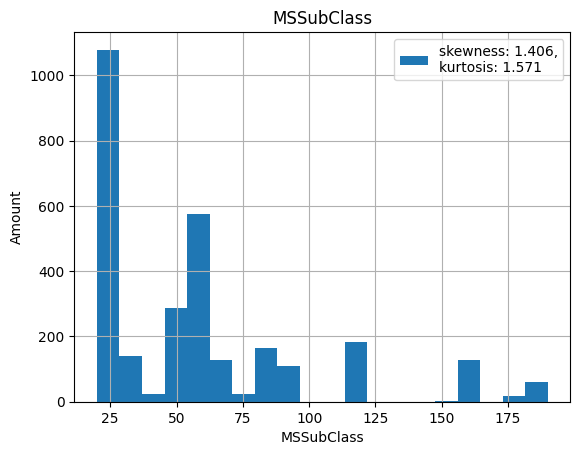

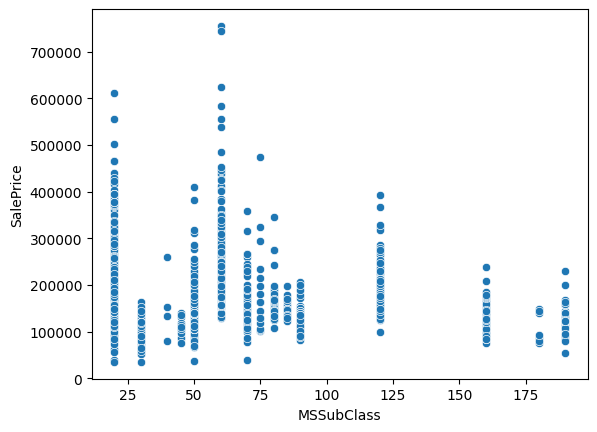

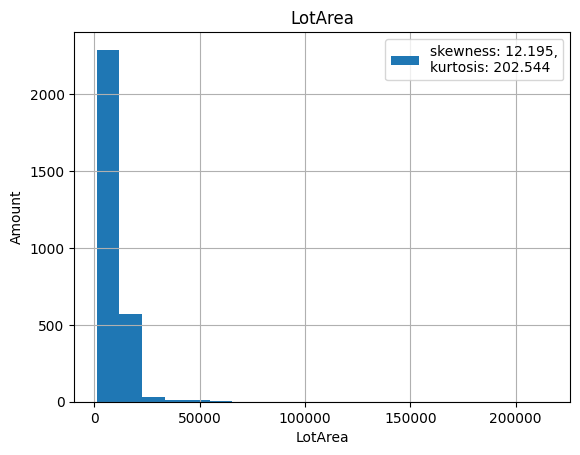

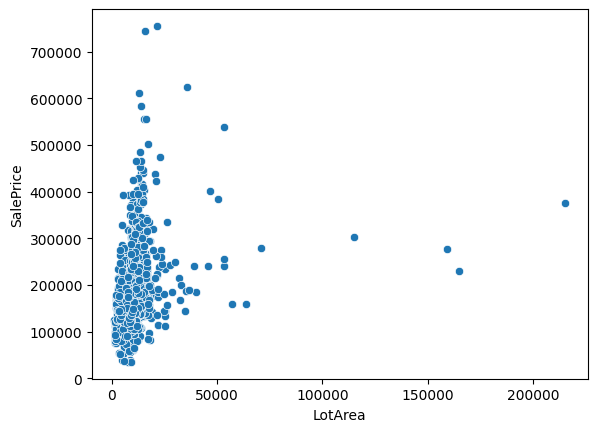

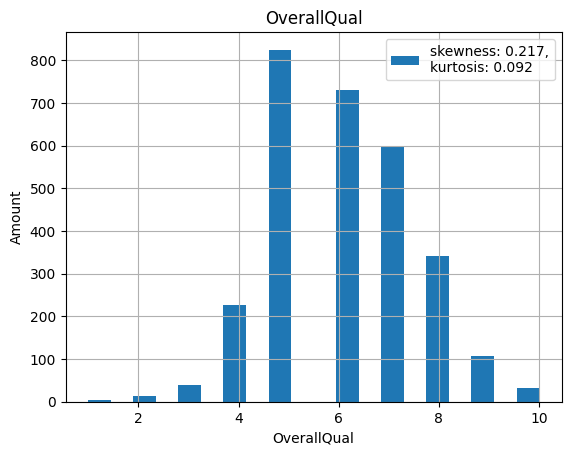

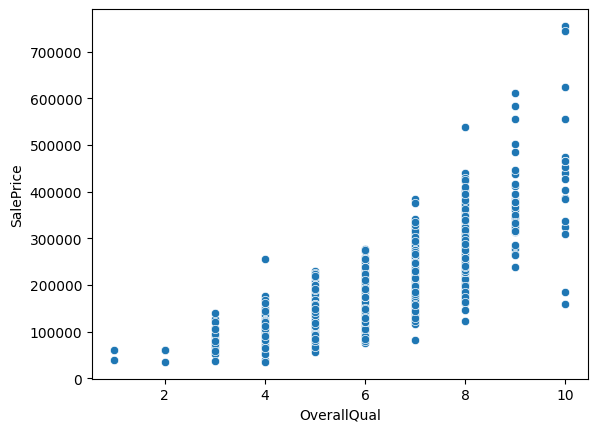

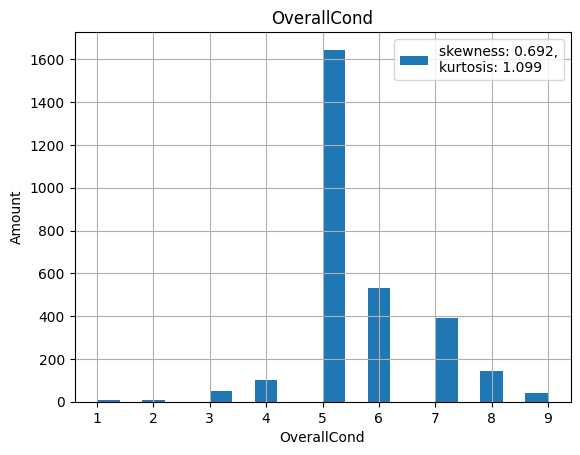

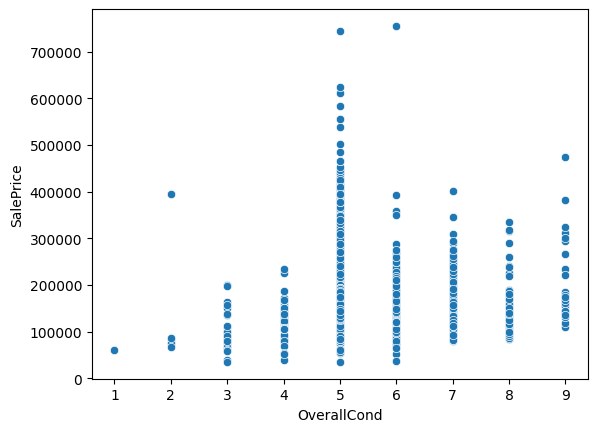

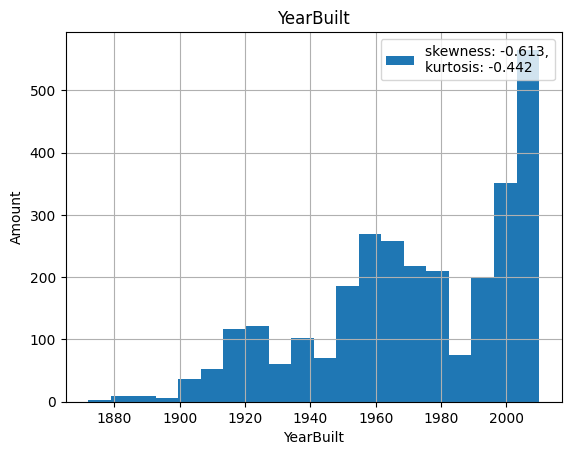

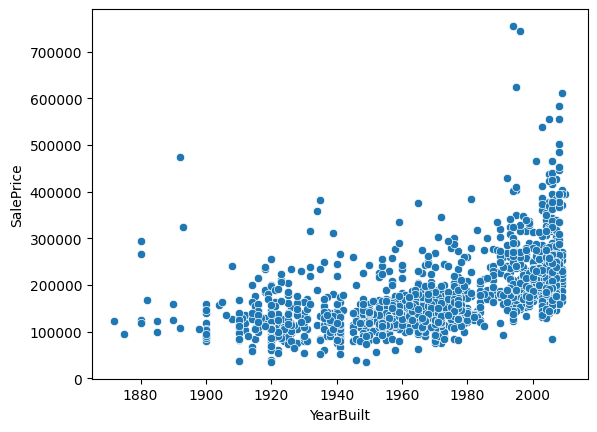

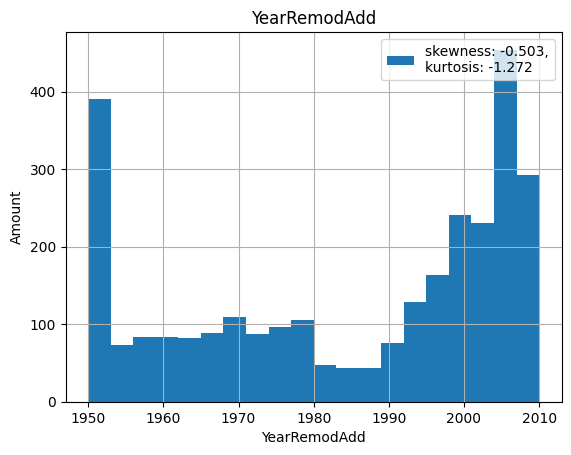

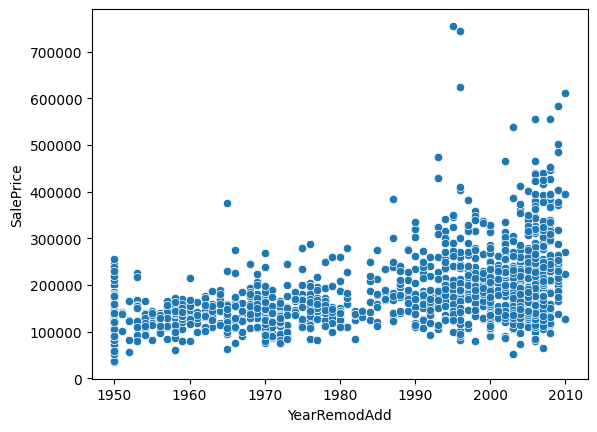

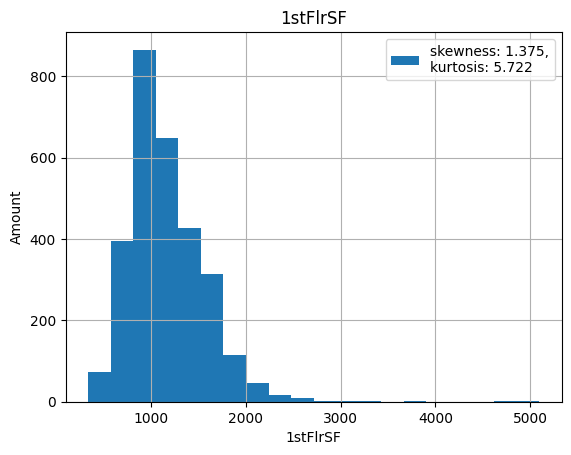

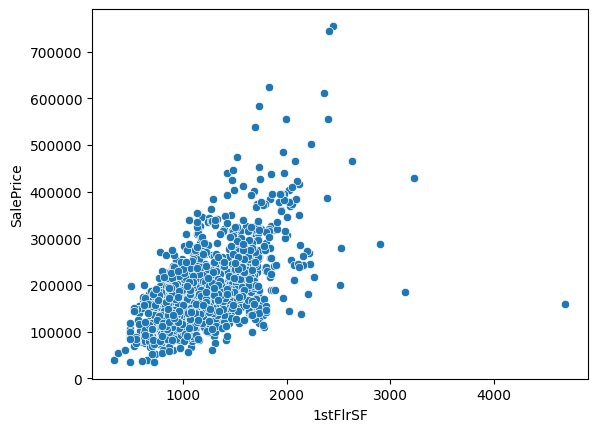

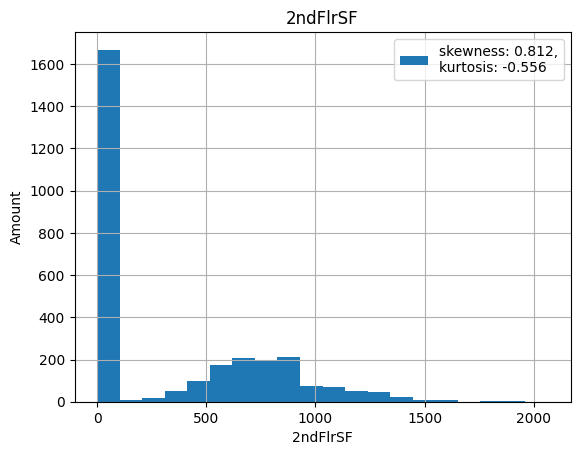

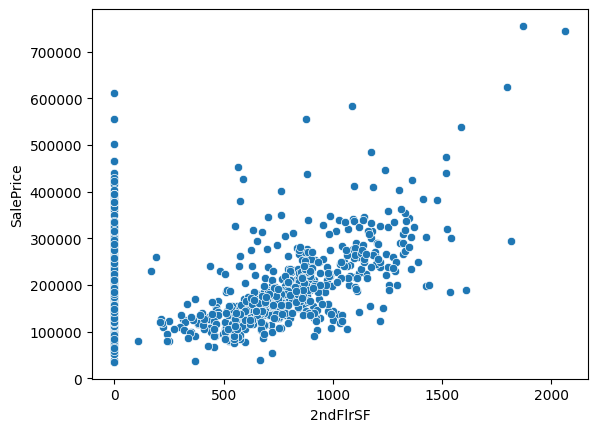

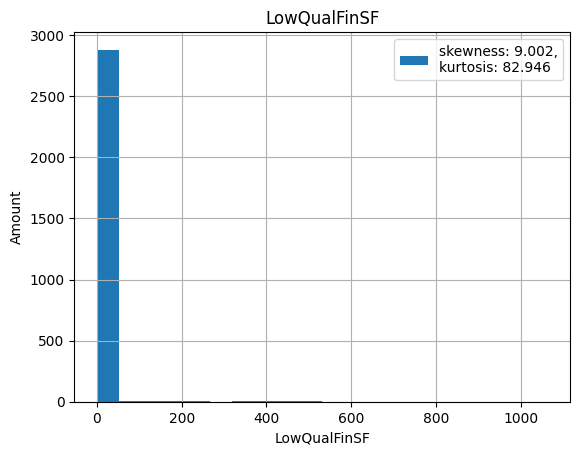

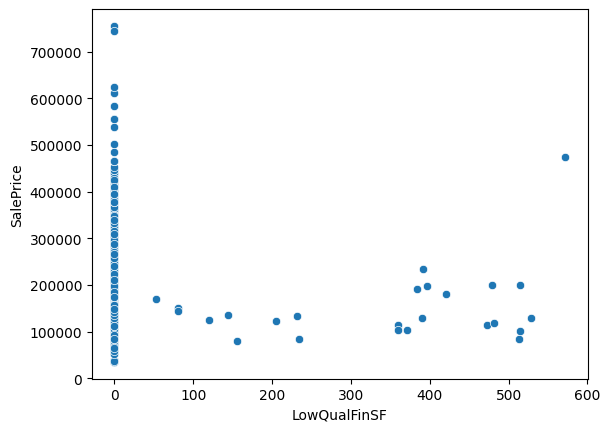

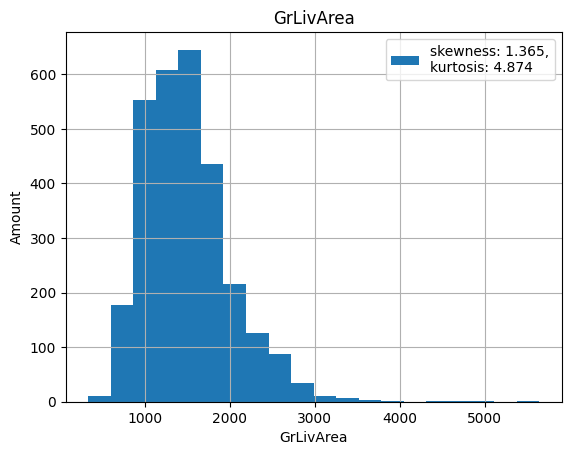

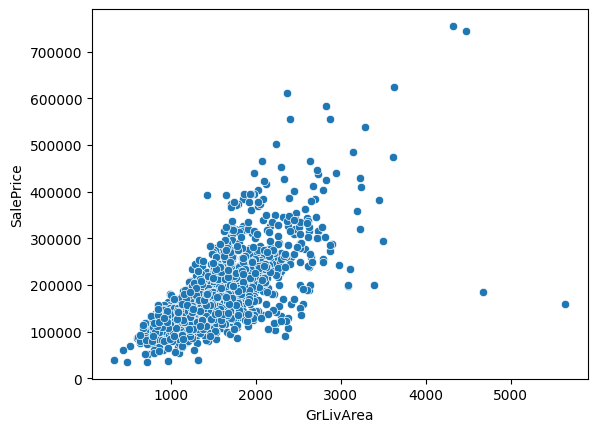

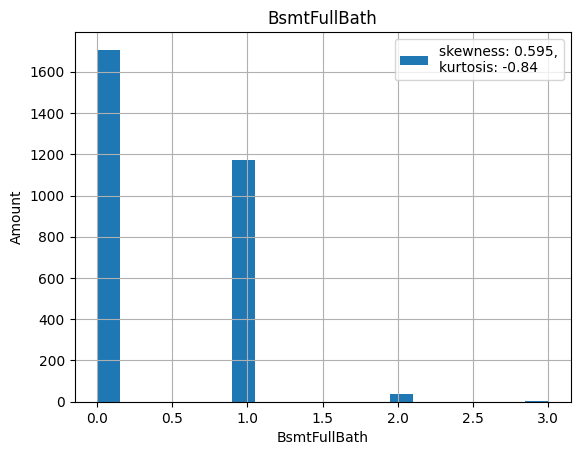

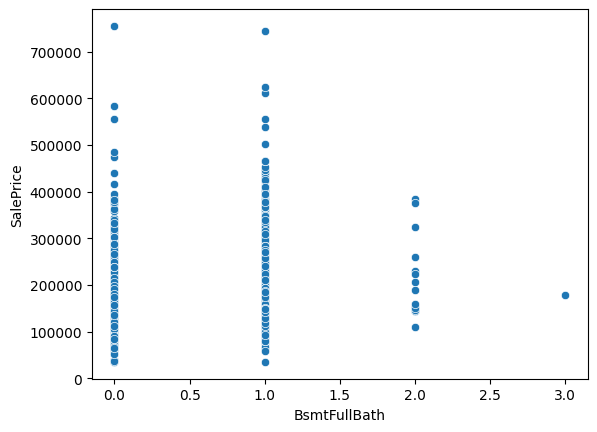

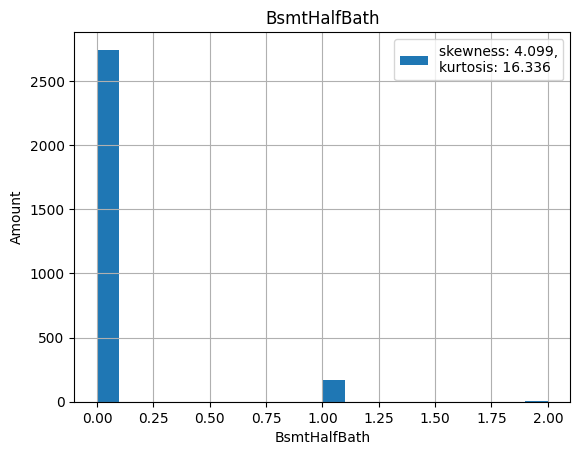

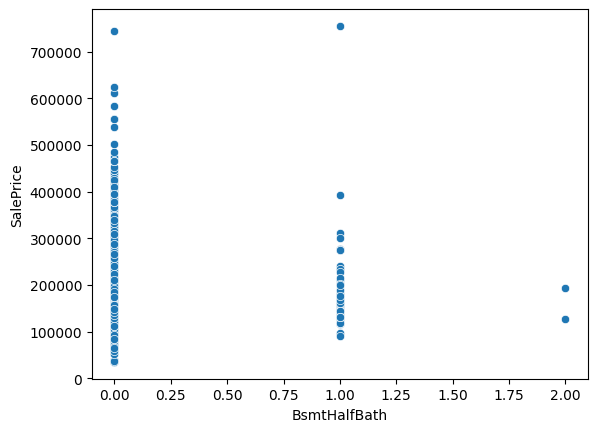

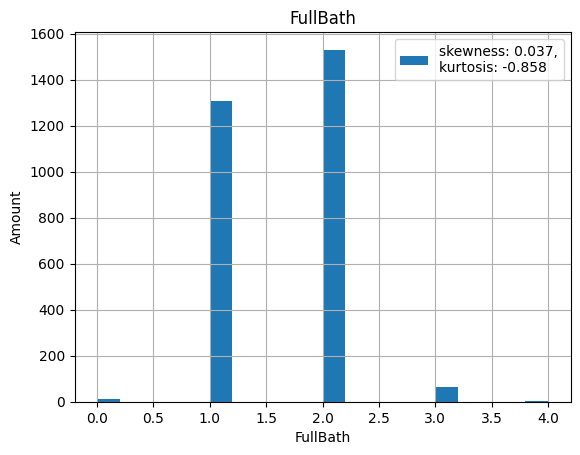

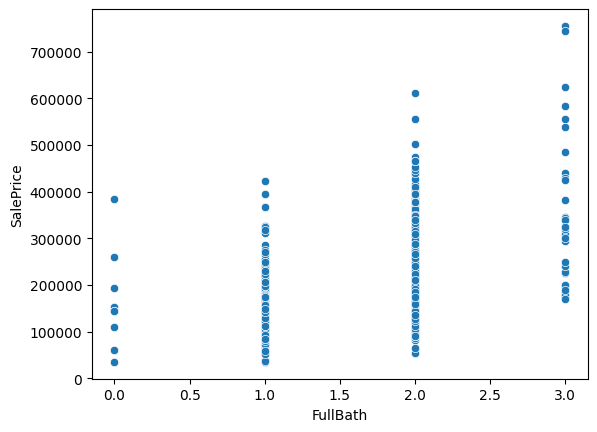

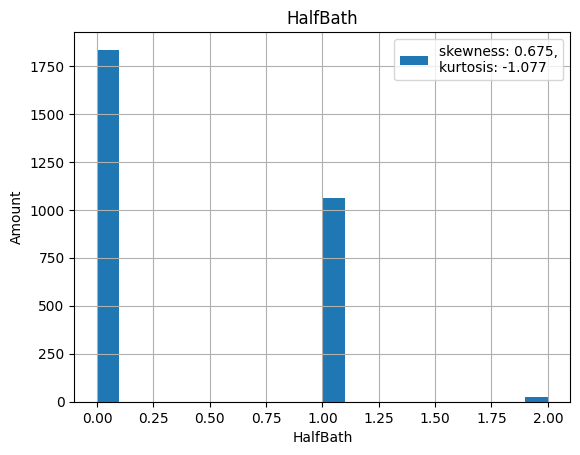

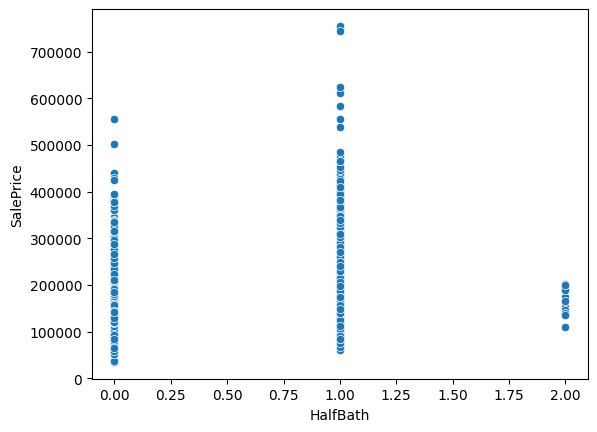

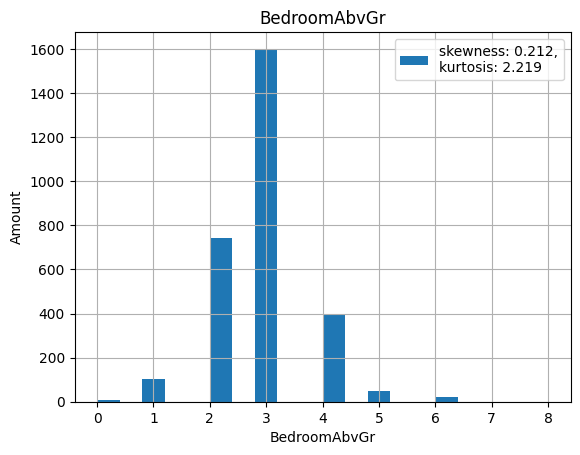

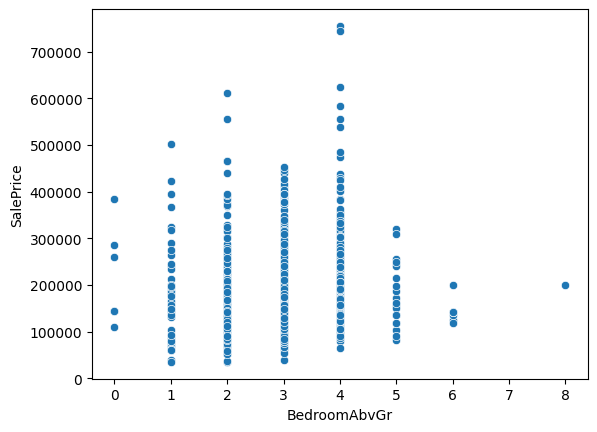

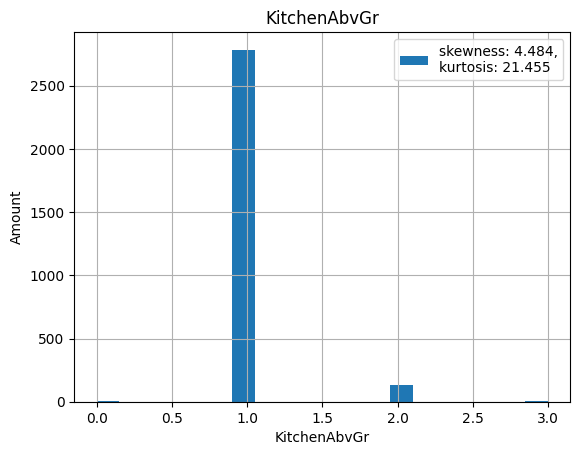

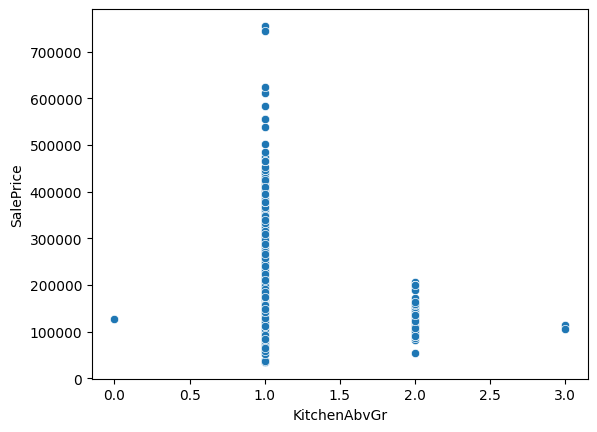

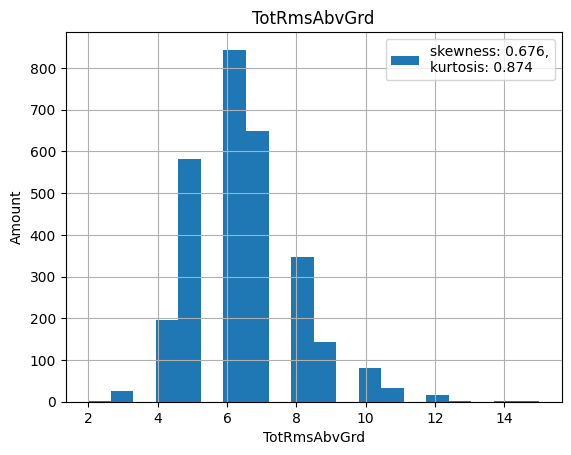

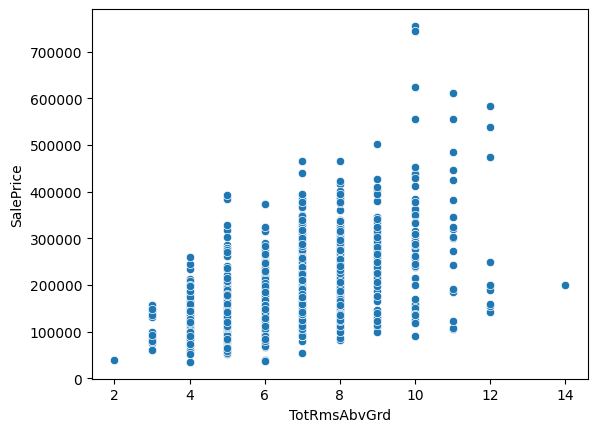

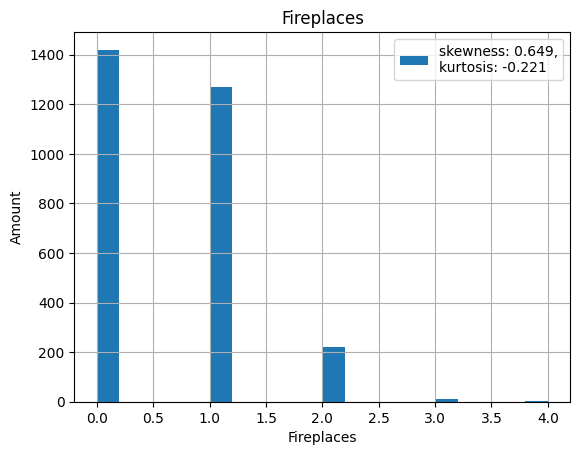

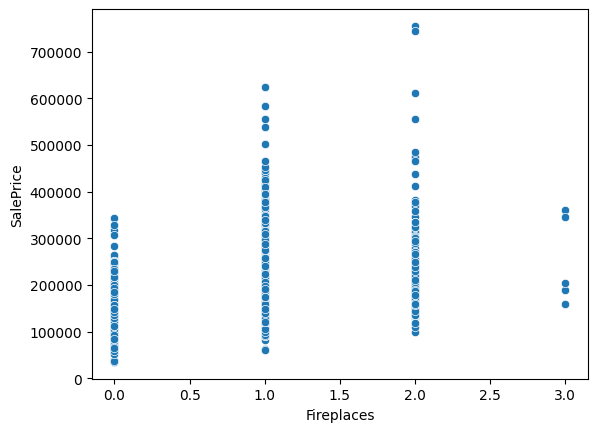

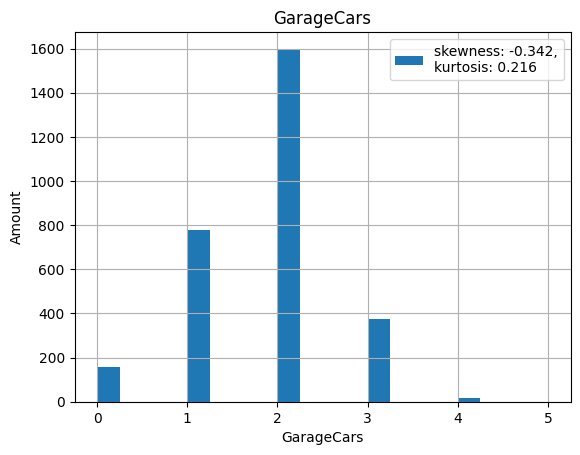

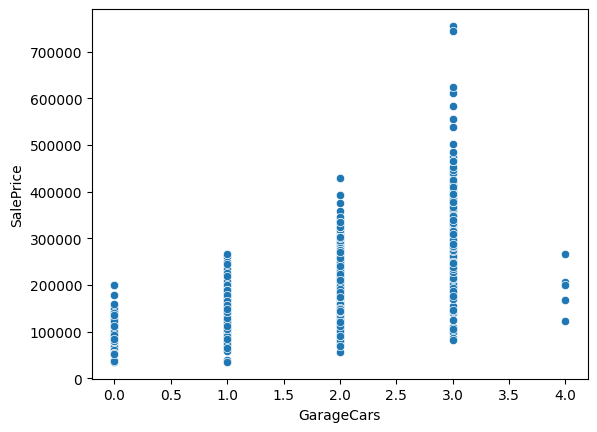

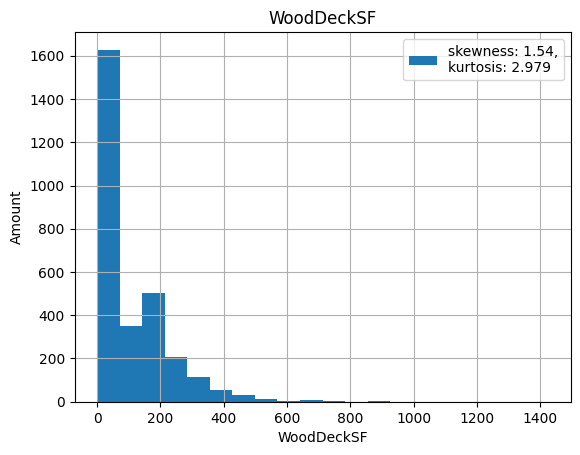

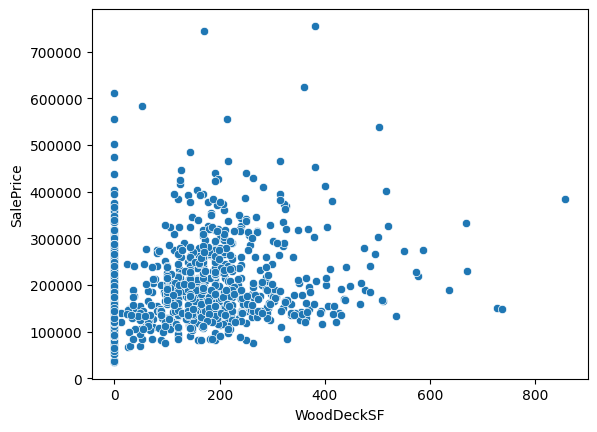

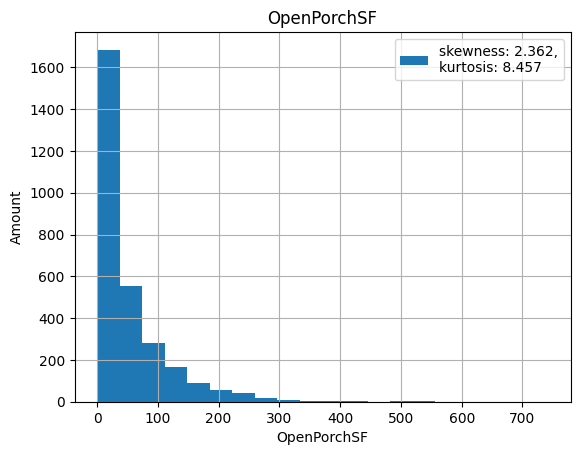

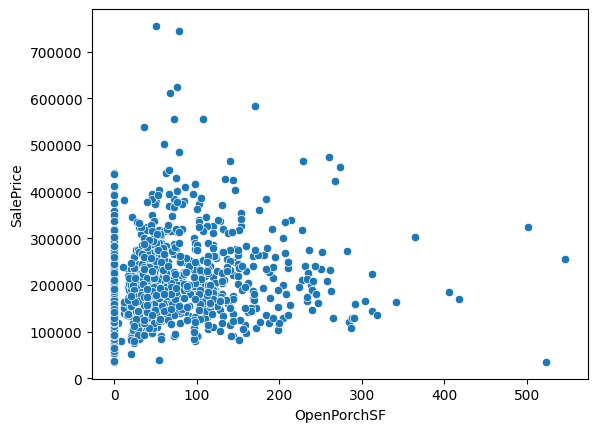

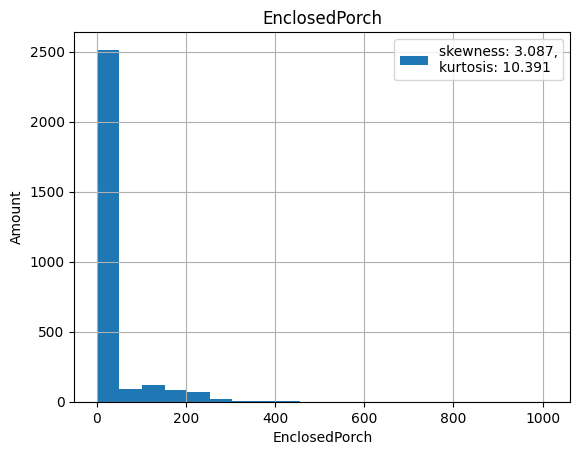

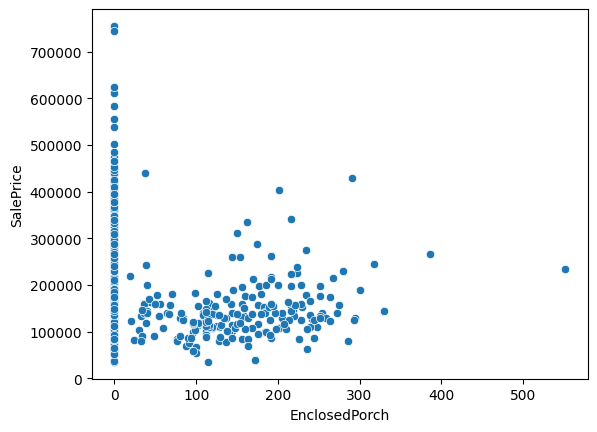

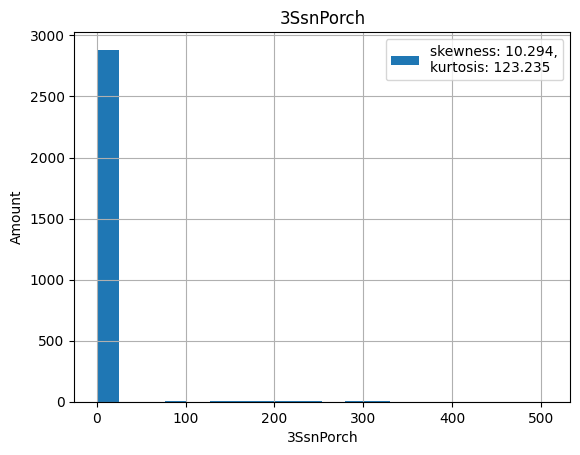

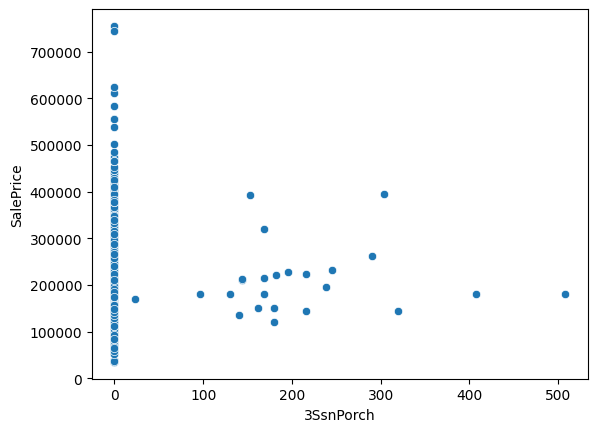

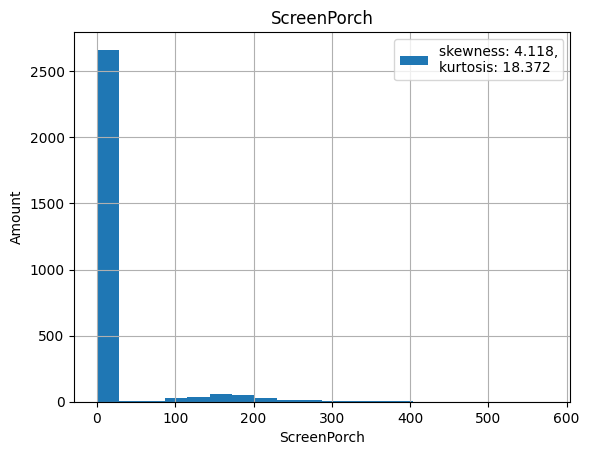

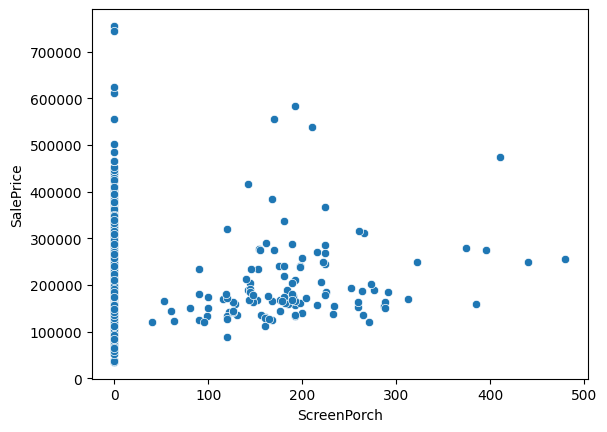

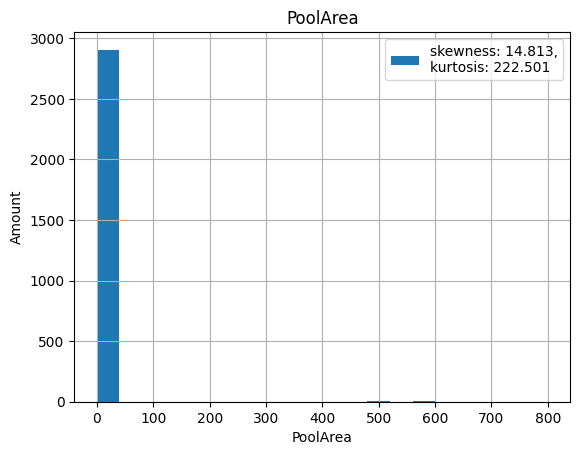

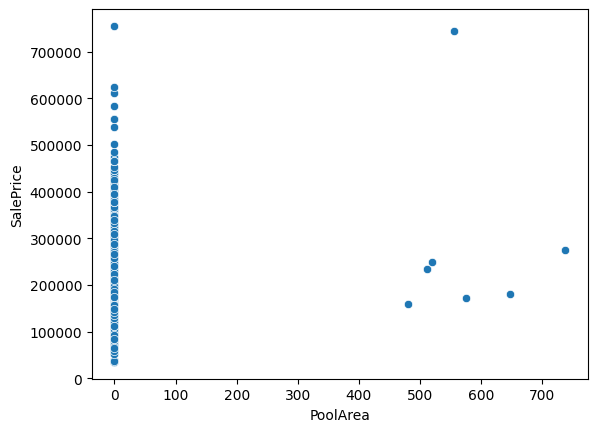

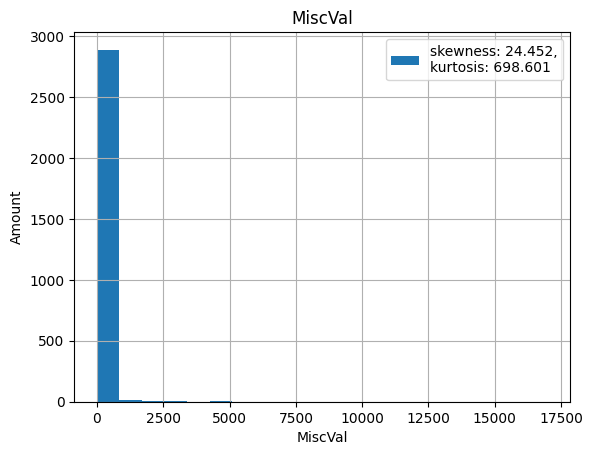

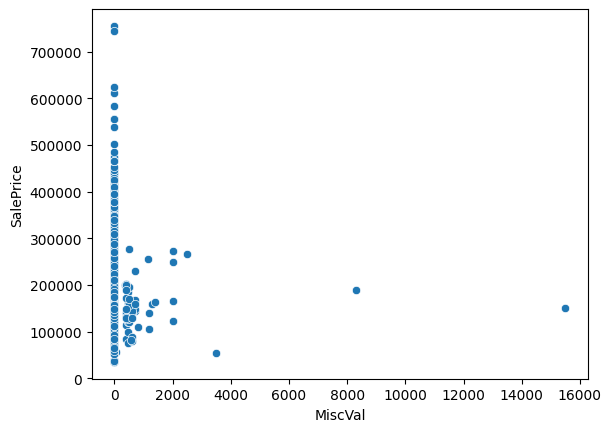

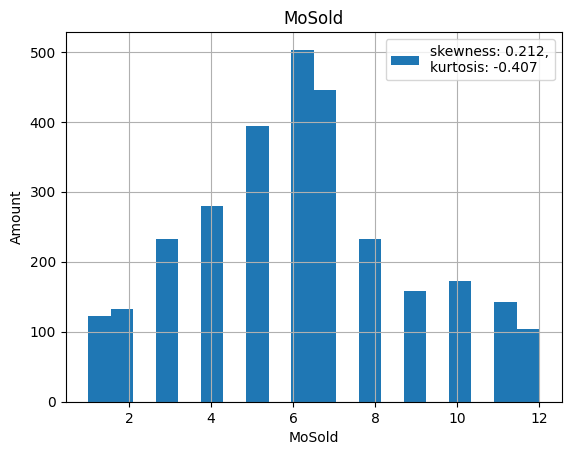

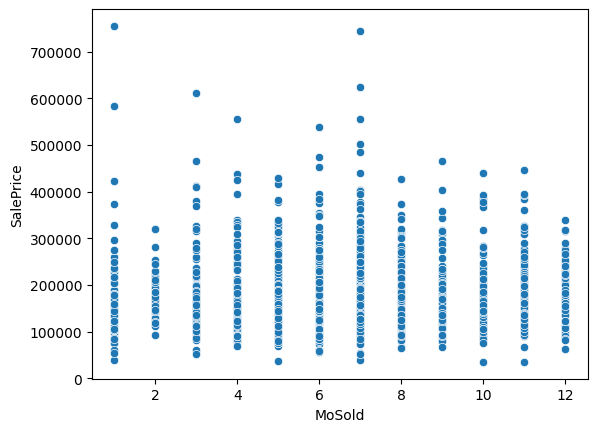

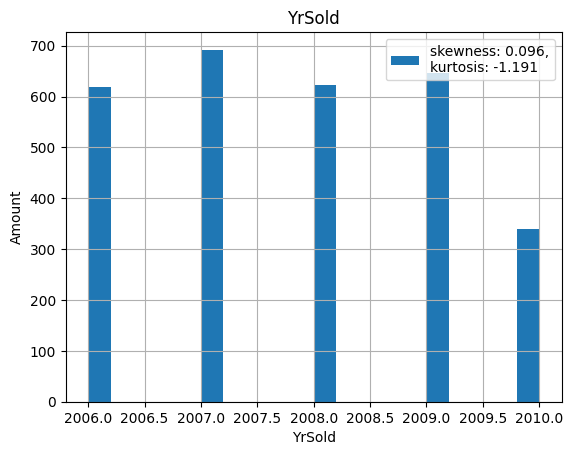

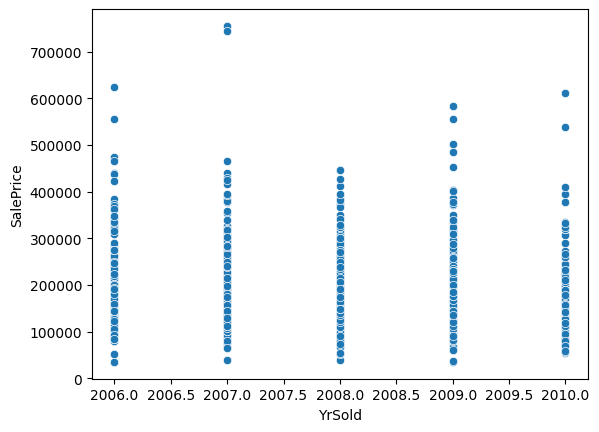

In [347]:
for i in int_cols:
    all_data[i].hist(bins=20)
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('Amount')
    plt.legend((f'skewness: {round(skew(train[i], nan_policy='omit'), 3)},\n' +
                f'kurtosis: {round(kurtosis(train[i], nan_policy='omit'), 3)}', ), 
                loc='upper right'
            )
    plt.show()
    sns.scatterplot(data=train, x=i, y=y)
    plt.show()

In [348]:
"""
влево: LotArea, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal 
вправо: YearBuilt
"""

'\nвлево: LotArea, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal \nвправо: YearBuilt\n'

In [349]:
left = ['LotArea', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
right = ['YearBuilt']

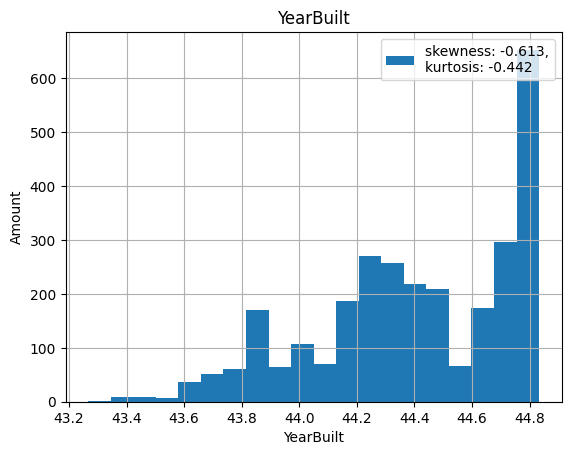

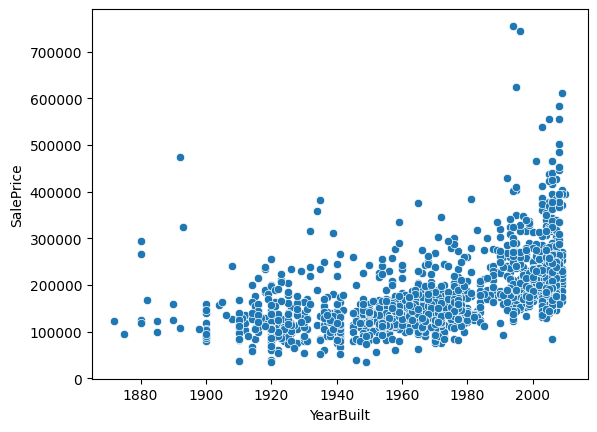

In [350]:
for i in right:
    all_data[i] = np.sqrt(all_data[i])
    all_data[i].hist(bins=20)
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('Amount')
    plt.legend((f'skewness: {round(skew(train[i], nan_policy='omit'), 3)},\n' +
                f'kurtosis: {round(kurtosis(train[i], nan_policy='omit'), 3)}', ), 
                loc='upper right'
            )
    plt.show()
    sns.scatterplot(data=train, x=i, y=y)
    plt.show()

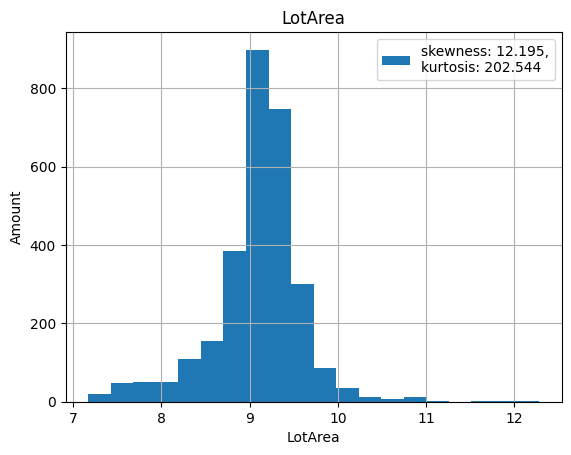

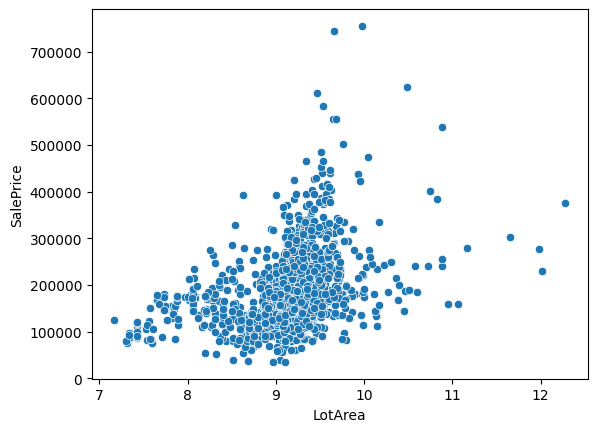

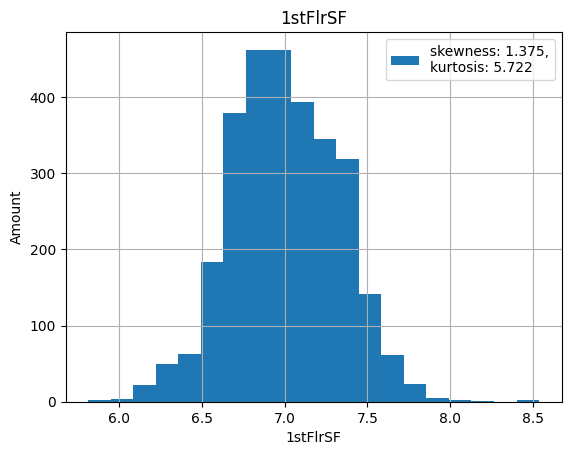

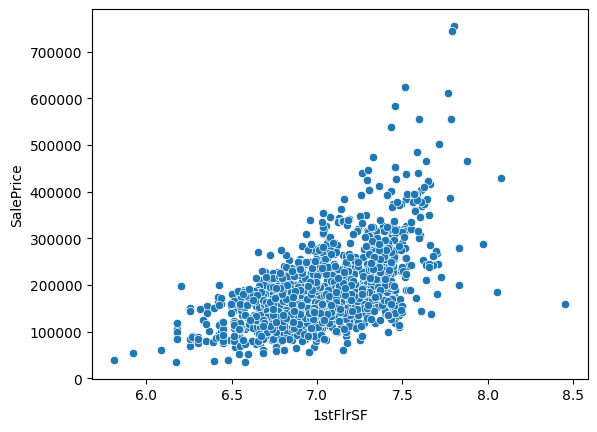

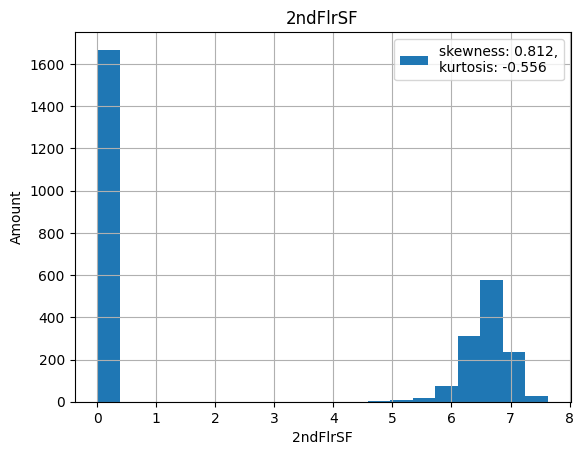

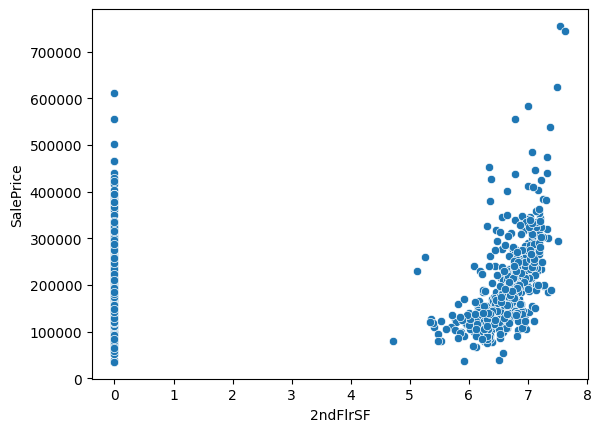

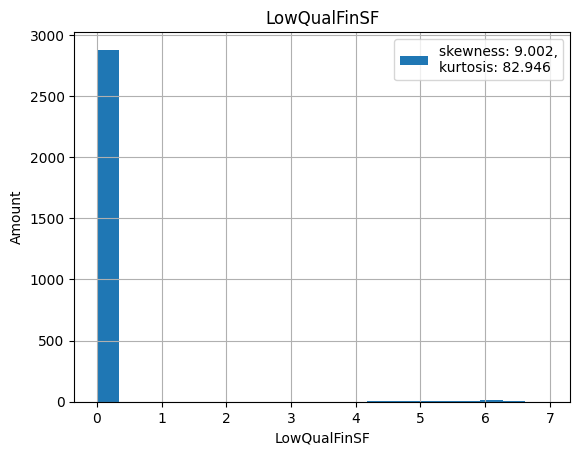

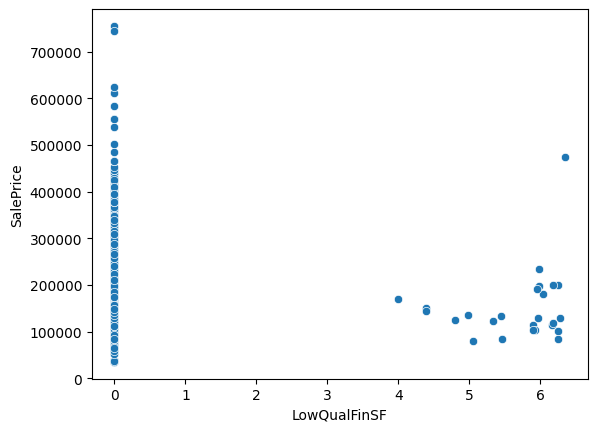

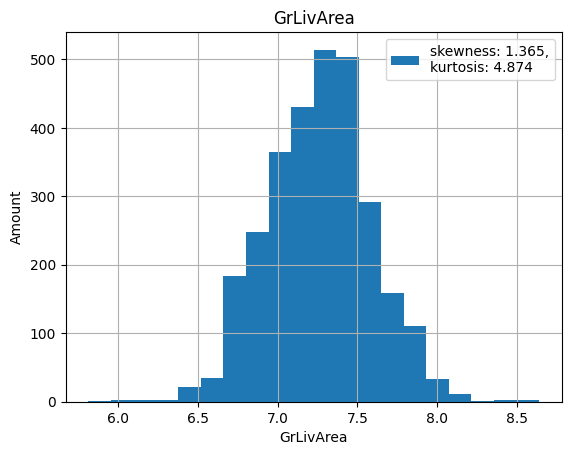

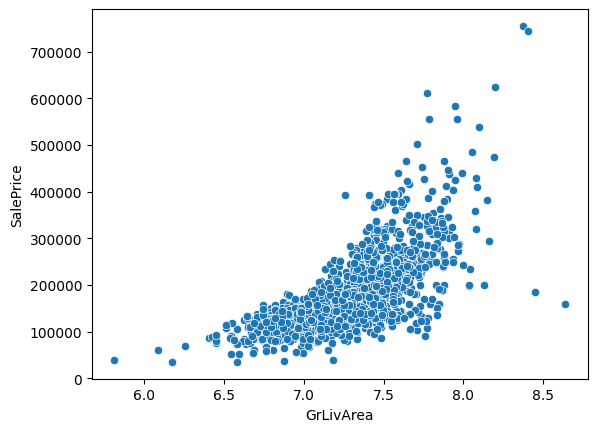

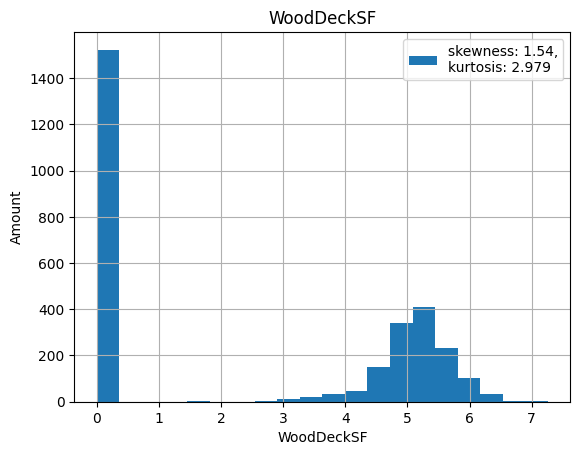

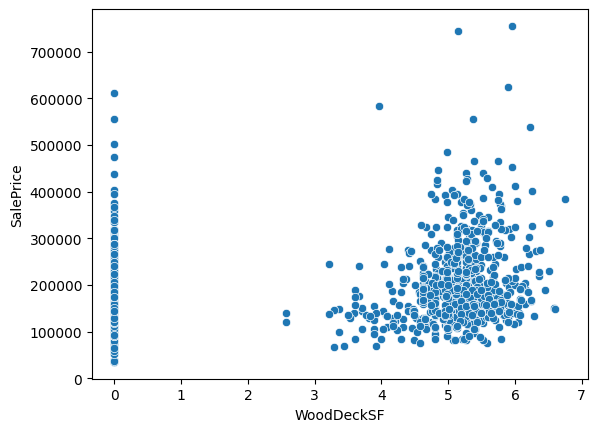

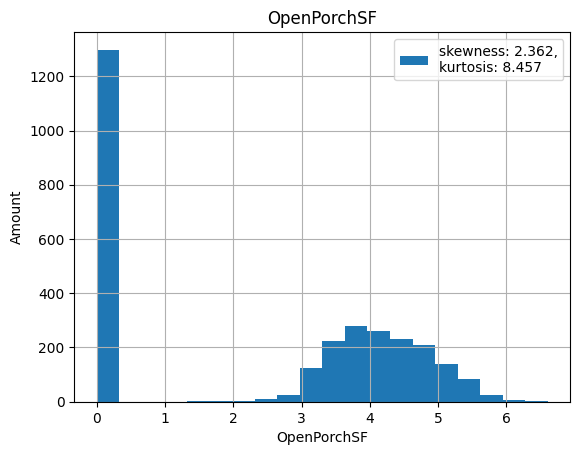

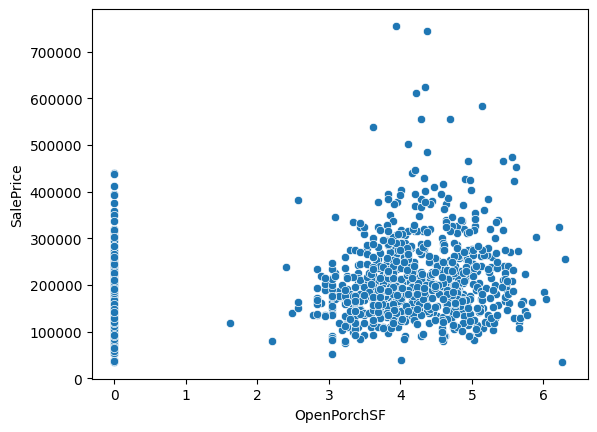

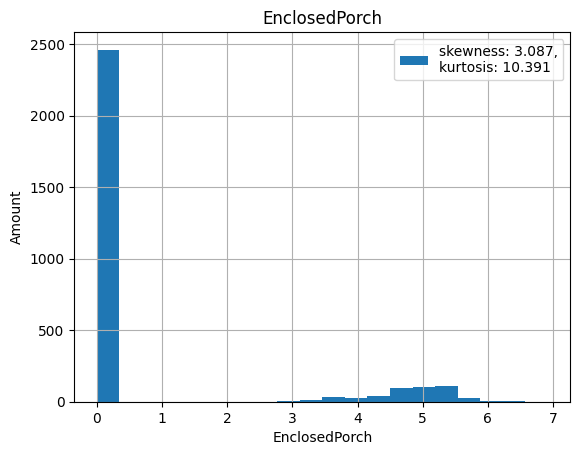

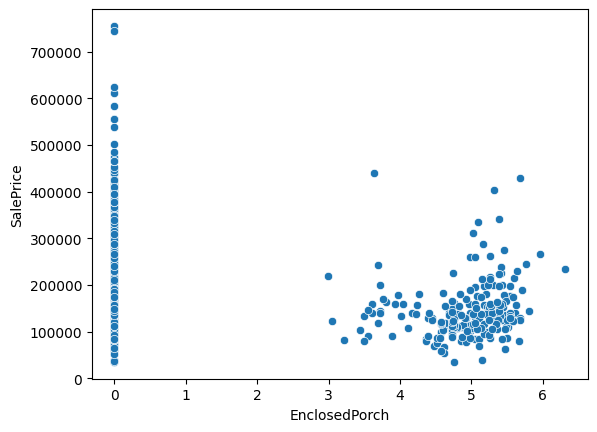

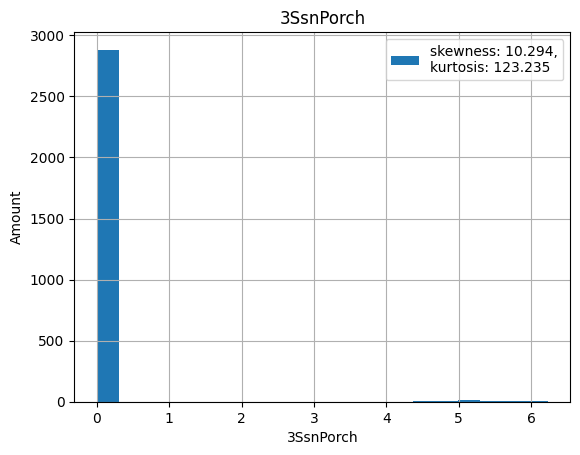

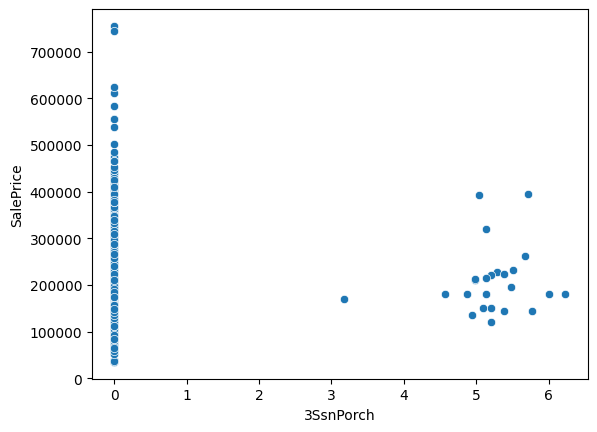

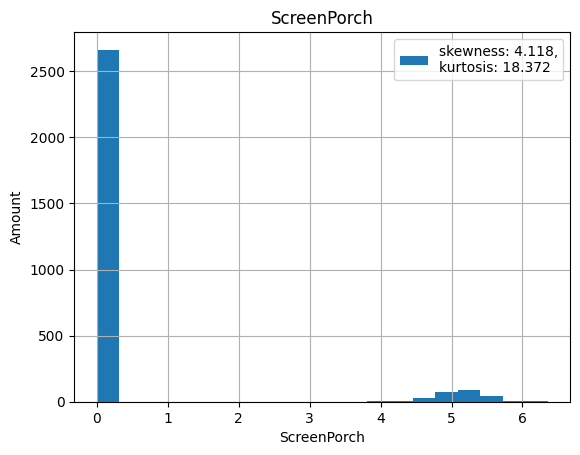

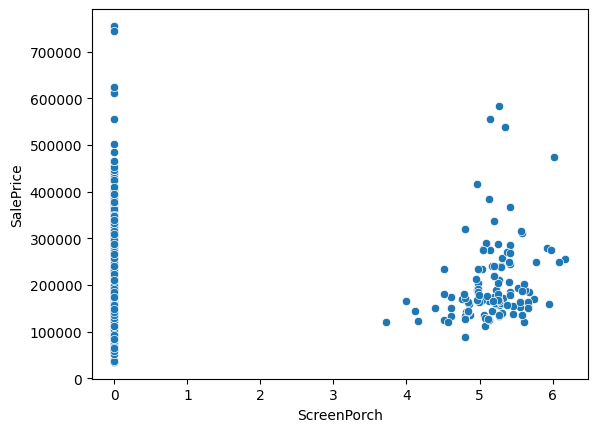

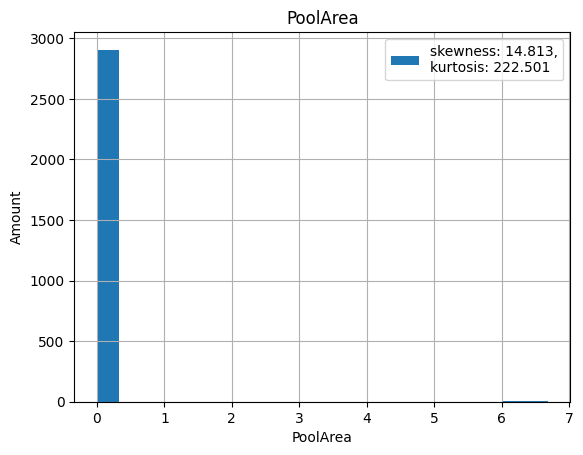

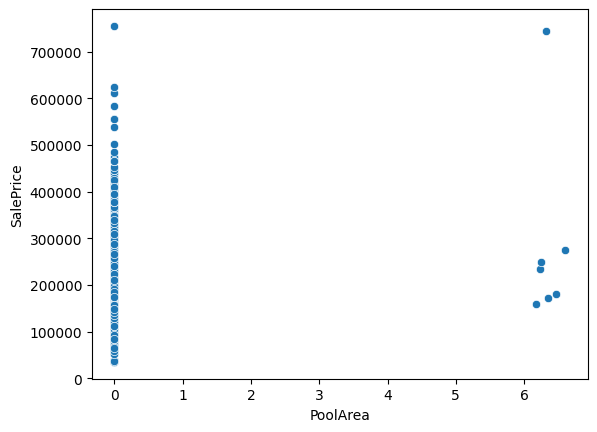

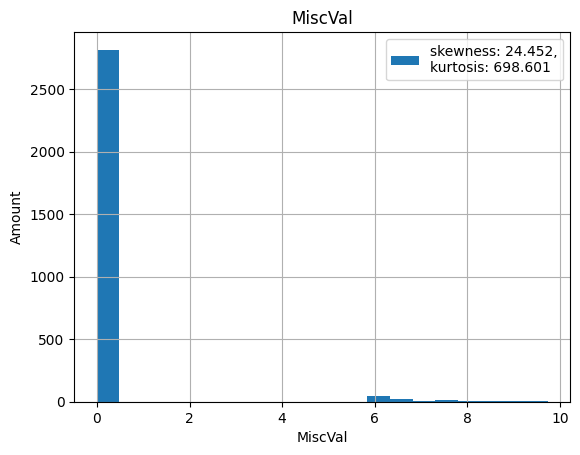

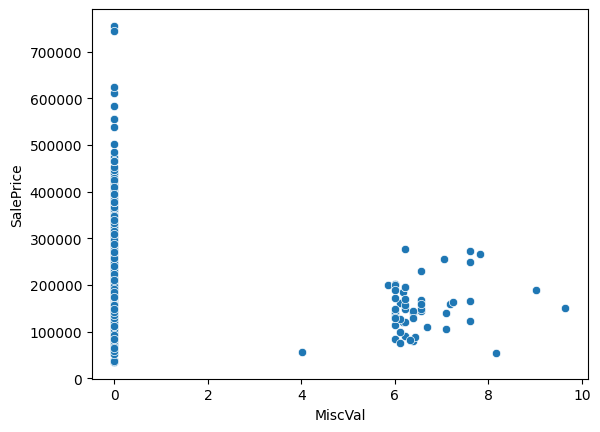

In [351]:
for i in left:
    all_data[i] = np.log1p(all_data[i])
    all_data[i].hist(bins=20)
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('Amount')
    plt.legend((f'skewness: {round(skew(train[i], nan_policy='omit'), 3)},\n' +
                f'kurtosis: {round(kurtosis(train[i], nan_policy='omit'), 3)}', ), 
                loc='upper right'
            )
    plt.show()
    sns.scatterplot(data=all_data[:train.shape[0]], x=i, y=y)
    plt.show()

In [352]:
print(all_data.isnull().sum().sort_values(ascending=False).head(30))

MSSubClass      0
HalfBath        0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
FullBath        0
GarageYrBlt     0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
Electrical      0
GarageType      0
GarageFinish    0
MSZoning        0
ScreenPorch     0
SaleType        0
YrSold          0
MoSold          0
MiscVal         0
Fence           0
PoolQC          0
PoolArea        0
3SsnPorch       0
dtype: int64


In [353]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [354]:
# Удаление выбросов
print(all_data.shape)
print(train.shape, test.shape)
train = all_data.iloc[:train.shape[0]]
test = all_data.iloc[train.shape[0]:]
print(train.shape, test.shape)

train = pd.concat([train, y], axis=1)
train.drop(train[(train['GrLivArea'] > 8.25) & (train['SalePrice'] < 300_000)].index, inplace=True, axis=0)
print(train.shape, test.shape)
y = train['SalePrice']
train.drop(['SalePrice'], axis=1, inplace=True)
print(train.shape, test.shape)
all_data = pd.concat([train.iloc[:,:], test], axis=0)
print(all_data.shape)

(2919, 79)
(1460, 78) (1459, 78)
(1460, 79) (1459, 79)
(1458, 80) (1459, 79)
(1458, 79) (1459, 79)
(2917, 79)


# Кодирование признаков

In [355]:
# кринж
all_data['LotShape'].replace({
    'Reg' : '3',
    'IR1': '2',
    'IR2': '1',
    'IR3': '0'
    }, inplace=True)
all_data['LotShape'] = all_data['LotShape'].astype(int)

all_data['ExterQual'].replace({
    'Ex': '4', 
    'Gd': '3', 
    'TA': '2', 
    'Fa': '1', 
    'Po': '0'
    }, inplace=True)
all_data['ExterQual'] = all_data['ExterQual'].astype(int)

all_data['ExterCond'].replace({
    'Ex': '4', 
    'Gd': '3', 
    'TA': '2', 
    'Fa': '1', 
    'Po': '0'
    }, inplace=True)
all_data['ExterCond'] = all_data['ExterCond'].astype(int)

all_data['HeatingQC'].replace({
    'Ex': '4', 
    'Gd': '3', 
    'TA': '2', 
    'Fa': '1', 
    'Po': '0'
    }, inplace=True)
all_data['HeatingQC'] = all_data['HeatingQC'].astype(int)

all_data['KitchenQual'].replace({
    'Ex': '4', 
    'Gd': '3', 
    'TA': '2', 
    'Fa': '1', 
    'Po': '0'
    }, inplace=True)
all_data['KitchenQual'] = all_data['KitchenQual'].astype(int)

all_data['FireplaceQu'].replace({
    'Ex': '5', 
    'Gd': '4', 
    'TA': '3', 
    'Fa': '2', 
    'Po': '1',
    'No': '0'
    }, inplace=True)
all_data['FireplaceQu'] = all_data['FireplaceQu'].astype(int)

all_data['PoolQC'].replace({
    'Ex': '4', 
    'Gd': '3', 
    'TA': '2', 
    'Fa': '1', 
    'No': '0'
    }, inplace=True)
all_data['PoolQC'] = all_data['PoolQC'].astype(int)

###################################################################

all_data['BsmtQual'].replace({
    'Ex': '5', 
    'Gd': '4', 
    'TA': '3', 
    'Fa': '2', 
    'Po': '1',
    'No': '0'
    }, inplace=True)
all_data['BsmtQual'] = all_data['BsmtQual'].astype(int)

all_data['BsmtCond'].replace({
    'Ex': '5', 
    'Gd': '4', 
    'TA': '3', 
    'Fa': '2', 
    'Po': '1',
    'No': '0'
    }, inplace=True)
all_data['BsmtCond'] = all_data['BsmtCond'].astype(int)

all_data['GarageQual'].replace({
    'Ex': '5', 
    'Gd': '4', 
    'TA': '3', 
    'Fa': '2', 
    'Po': '1',
    'No': '0'
    }, inplace=True)
all_data['GarageQual'] = all_data['GarageQual'].astype(int)

all_data['GarageCond'].replace({
    'Ex': '5', 
    'Gd': '4', 
    'TA': '3', 
    'Fa': '2', 
    'Po': '1',
    'No': '0'
    }, inplace=True)
all_data['GarageCond'] = all_data['GarageCond'].astype(int)

#####################################################################

all_data['BsmtExposure'].replace({
    'Gd': '3', 
    'Av': '2', 
    'Mn': '1', 
    'No': '0'
    }, inplace=True)
all_data['BsmtExposure'] = all_data['BsmtExposure'].astype(int)

#####################################################################

all_data['BsmtFinType1'].replace({
    'GLQ': '6',
    'ALQ': '5', 
    'BLQ': '4', 
    'Rec': '3', 
    'LwQ': '2', 
    'Unf': '1',
    'No': '0'
    }, inplace=True)
all_data['BsmtFinType1'] = all_data['BsmtFinType1'].astype(int)

all_data['BsmtFinType2'].replace({
    'GLQ': '6',
    'ALQ': '5', 
    'BLQ': '4', 
    'Rec': '3', 
    'LwQ': '2', 
    'Unf': '1',
    'No': '0'
    }, inplace=True)
all_data['BsmtFinType2'] = all_data['BsmtFinType2'].astype(int)

#####################################################################

all_data['Functional'].replace({
    'Typ': '7',
    'Min1': '6',
    'Min2': '5', 
    'Mod': '4', 
    'Maj1': '3', 
    'Maj2': '2', 
    'Sev': '1',
    'Sal': '0'
    }, inplace=True)
all_data['Functional'] = all_data['Functional'].astype(int)


all_data['GarageFinish'].replace({
    'Fin': '3', 
    'RFn': '2', 
    'Unf': '1', 
    'No': '0'
    }, inplace=True)
all_data['GarageFinish'] = all_data['GarageFinish'].astype(int)

all_data['Fence'].replace({
    'GdPrv': '4',
    'MnPrv': '3', 
    'GdWo': '2', 
    'MnWw': '1', 
    'No': '0'
    }, inplace=True)
all_data['Fence']  = all_data['Fence'].astype(int)

all_data.loc[all_data['SaleCondition'] == 'Normal', 'SaleCondition'] = '1'
all_data.loc[all_data['SaleCondition'] != 'Normal', 'SaleCondition'] = '0'
all_data['SaleCondition'] = all_data['SaleCondition'].astype(int)

C:\Users\tolya\AppData\Local\Temp\ipykernel_4592\822501694.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_data['LotShape'].replace({
C:\Users\tolya\AppData\Local\Temp\ipykernel_4592\822501694.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[

In [356]:
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)

from category_encoders.binary import BinaryEncoder
BE = BinaryEncoder()
for i in cols_for_BE:
    enc = BE.fit_transform(all_data[i])

    encoded_colm = pd.DataFrame(enc)
    all_data = pd.concat([all_data, encoded_colm], axis=1)
    all_data = all_data.drop([i], axis=1)

from sklearn.preprocessing import LabelEncoder

for i in cols_as_distance:
    LE = LabelEncoder()
    all_data[i] = LE.fit_transform(all_data[i])

In [357]:
cols = all_data.select_dtypes(exclude=['int', 'float']).columns.tolist()
for i in cols:
    print(all_data[i].unique())

In [358]:
cols

[]

In [359]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2917 entries, 0 to 1458
Columns: 126 entries, LotFrontage to Utilities_1
dtypes: float64(22), int32(23), int64(81)
memory usage: 2.6 MB


In [360]:
from sklearn.preprocessing import StandardScaler
train = all_data.iloc[:train.shape[0], :]
test = all_data.iloc[train.shape[0]:, :]

cols = train.columns
SS = StandardScaler()
train = SS.fit_transform(train)
test = SS.transform(test)

train = pd.DataFrame(train,columns=cols)
test = pd.DataFrame(test,columns=cols)

In [378]:
X = train.copy()
y_loged = np.log1p(y.copy())
from xgboost import XGBRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y_loged, test_size = 0.3, random_state = 0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 0)

In [374]:
model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
             colsample_bynode=1, colsample_bytree=0.9, enable_categorical=False,
             eval_metric='rmse', gamma=0.5, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.025, max_delta_step=0,
             max_depth=5, min_child_weight=7, early_stopping_rounds=10,
             monotone_constraints='()', n_estimators=2_000, n_jobs=10,
             num_parallel_tree=1, random_state=42,
             reg_alpha=.1, reg_lambda=0.5, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

RMSE: 0.13805519070072123
RMSE: 0.12918187173729356
SCORE: 0.8892136100385687


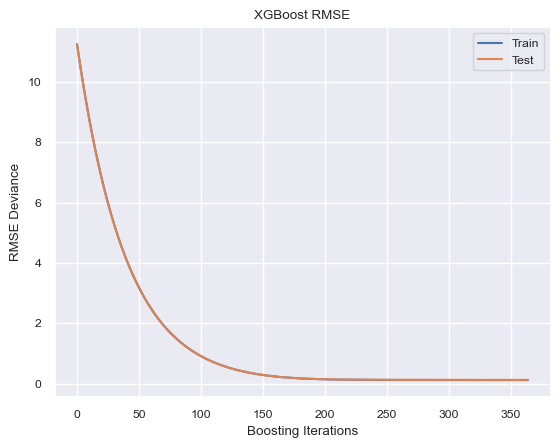

In [380]:
model.fit(X_train, y_train, verbose=False, eval_set= [(X_train, y_train), (X_val, y_val)])

results = model.evals_result()

predicts = model.predict(X_test)
print(f"RMSE: {root_mean_squared_error(y_test, predicts)}")
print(f"RMSE: {results['validation_1']['rmse'][-1]}")
print(f"SCORE: {model.score(X_test, y_test)}")

epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()

ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')

plt.title('XGBoost RMSE')
plt.xlabel("Boosting Iterations")
plt.ylabel("RMSE Deviance")
plt.legend(loc="upper right")

In [382]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [399]:
xgb_rs = RandomizedSearchCV(model, {
        "max_depth": [3, 5, 6, 7, 9, 12],
        "min_child_weight": [1, 3, 5, 7],
        "gamma": [0, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
        "subsample":[0.6, 0.7, 0.8, 0.9, 1],
        "colsample_bytree": [0.6, 0.7, 0.8, 0.9, 1],
        "reg_alpha": [0, 0.01,0.1, 1],
        "reg_lambda": [0, 0.1, 0.5, 1],
        "learning_rate": [0.01, 0.015, 0.025, 0.05, 0.1],
        'eval_metric': ['rmse'],
        'n_jobs': [-1],
        'n_estimators': [1000, 2000, 3000]
}, 
    cv = 5,
    n_jobs=-1,
    scoring = 'neg_root_mean_squared_error')

xgb_rs.fit(X_train, y_train, verbose=False, eval_set= [(X_train, y_train), (X_val, y_val)])
xgb_bp = xgb_rs.best_params_
xgb_be = xgb_rs.best_estimator_

In [400]:
print(f"RMSE: {root_mean_squared_error(y_test, xgb_be.predict(X_test))}")

RMSE: 0.1263619754546987


In [395]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha=.0005, random_state=1))
Enet = make_pipeline(RobustScaler(), ElasticNet(alpha=.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=.6, kernel='polynomial', degree=2, coef0=2.5)
GB = GradientBoostingRegressor(n_estimators=3_000, learning_rate=.05,
                               max_depth=4, max_features=None,
                               min_samples_leaf=15, min_samples_split=10,
                               loss='huber', random_state=5)
XGB = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
             colsample_bynode=1, colsample_bytree=0.9, enable_categorical=False,
             eval_metric='rmse', gamma=0.5, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.025, max_delta_step=0,
             max_depth=5, min_child_weight=7,
             monotone_constraints='()', n_estimators=2_000, n_jobs=10,
             num_parallel_tree=1, random_state=42,
             reg_alpha=.1, reg_lambda=0.5, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [407]:
from sklearn.ensemble import StackingRegressor, BaggingRegressor
SR = StackingRegressor(estimators=[
    ('l', lasso), 
    ('E', Enet),
    ('KRR', KRR),
    ('GB', GB), 
    ('XGB', XGB)
    ], cv=5, n_jobs=-1, verbose=1)
SR.fit(X_train, y_train)
print(f"RMSE: {root_mean_squared_error(y_test, SR.predict(X_test))}")

RMSE: 0.12179274095776181


In [408]:
predicts = SR.predict(test)
pattern.SalePrice = np.expm1(predicts)
pattern.to_csv('results.csv', index=False)